## Importing Libraries

In [20]:
import _pickle as pickle
import pandas as pd
import numpy as np
np.random.seed(0)
from gensim.models import Word2Vec
from nltk import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

## Importing Data

In [2]:
# Loading in the first DF
with open("city1_clean.pkl",'rb') as fp:
    city_1 = pickle.load(fp)

# Loading in the second DF
with open("city2_clean.pkl",'rb') as fp:
    city_2 = pickle.load(fp)

In [3]:
city_1 = pd.DataFrame(city_1, columns=['tweet'])
city_2 = pd.DataFrame(city_2, columns=['tweet'])

In [4]:
data = city_1.append(city_2)

## Tokenizing

In [5]:
tot_vocab = set(word for twt in data for word in twt)


In [6]:
glove = {}
with open('glove.twitter.27B.200d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in tot_vocab:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [8]:
## seattle is city1 and jacksonville is city2
city1c = city_1.tweet.map(word_tokenize).values
city2c = city_2.tweet.map(word_tokenize).values
both = data.tweet.map(word_tokenize).values

## Word2Vec Models

In [10]:
c1model = Word2Vec(city1c, size=100, window=5, min_count=1, workers=4)
c2model = Word2Vec(city2c, size=100, window=5, min_count=1, workers=4)
bothmodel = Word2Vec(both, size=100, window=5, min_count=1, workers=4)

In [11]:
c1model.train(city1c, total_examples=c1model.corpus_count, epochs=10)

(995366, 1079960)

In [12]:
c2model.train(city2c, total_examples=c2model.corpus_count, epochs=10)

(1039951, 1135400)

In [13]:
bothmodel.train(both, total_examples=bothmodel.corpus_count, epochs=10)

(2037191, 2215360)

In [14]:
c_1 = c1model.wv
c_2 = c2model.wv
c_both = bothmodel.wv

## EDA Using Word2Vec Models SPECIFICALLY FOR TRUMP SEARCH

In [88]:
c_1.similarity('trump', 'ukraine')

0.6909179

In [89]:
c_2.similarity('trump', 'ukraine')

0.5263585

In [341]:
word = 'trump'
words = ['ukraine', 'lied', 'impeachment', 'corrupt', 'russia', 'putin', 'maga', 'wall', 'border']


In [342]:
Jacksonville = [c_2.similarity(word, i) for i in words]
Seattle = [c_1.similarity(word, i) for i in words]

In [343]:
sim_df = pd.DataFrame({'Jacksonville': Jacksonville, 
                       'Seattle': Seattle,},
                               index=words)
sim_df


,Jacksonville,Seattle
ukraine,0.526358,0.690918
lied,0.749775,0.803477
impeachment,0.675841,0.750242
corrupt,0.731648,0.793043
russia,0.746777,0.827448
putin,0.736542,0.776605
maga,0.724277,0.702402
wall,0.769364,0.751331
border,0.789158,0.625432


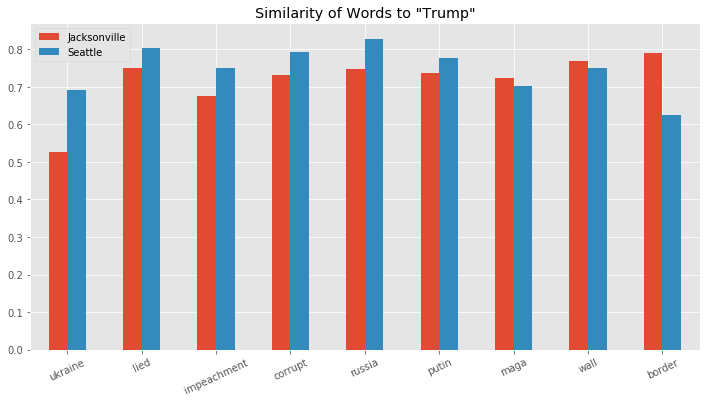

In [349]:
plt.style.use('ggplot')
sim_words_bycity = sim_df.plot.bar(rot=25, figsize=(12, 6))
plt.title('Similarity of Words to "Trump"')

plt.savefig('sim_to_trump_bargraph.png')
plt.show()

In [339]:
for i in words:
    print(i + ' in Seattle')
    print(pd.DataFrame(c_1.similar_by_word(i)))
    print('\n')
    print(i + ' in Jacksonville')
    print(pd.DataFrame(c_2.similar_by_word(i)))
    print('\n\n')

impeachment in Seattle
              0         1
0     heightens  0.957221
1       inquiry  0.956998
2     launching  0.942155
3  podernfamily  0.939966
4         erupt  0.933257
5      prompted  0.930677
6   notoriously  0.930641
7      snowball  0.922313
8   emphasizing  0.915383
9  ladypodsquad  0.913279


impeachment in Jacksonville
            0         1
0     inquiry  0.935479
1    launched  0.934558
2   announces  0.933400
3   espousing  0.927181
4       nancy  0.919398
5    baseless  0.914992
6      pelosi  0.911712
7      formal  0.904721
8  introduces  0.899481
9     trigger  0.899386



lied in Seattle
             0         1
0     congress  0.985135
1      falsely  0.982240
2   impeaching  0.981852
3  obstructing  0.981798
4         role  0.981302
5        filed  0.979440
6         made  0.978487
7       pelosi  0.978441
8     drafting  0.977764
9      alleges  0.977711


lied in Jacksonville
              0         1
0       trucker  0.984782
1  unbelievable  0.984318
2 

## Creating Word Clouds

In [28]:
tweet_all = " ".join(review for review in data.tweet)
tweet_c1 = " ".join(review for review in city_1.tweet)
tweet_c2 = " ".join(review for review in city_2.tweet)

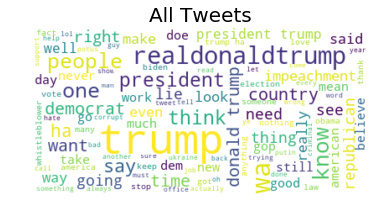

In [29]:
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_all)


allwc = plt.figure()
# Display the generated image:

plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('All Tweets', fontsize=20)
plt.axis('off')

allwc.savefig('alltweets_wc.png', dpi = 500) 

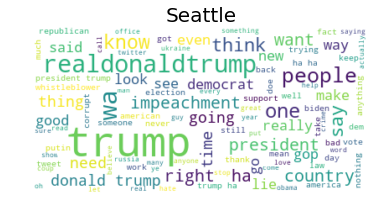

In [30]:
wordcloud_c1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_c1)

c1wc = plt.figure()

plt.imshow(wordcloud_c1, interpolation='bilinear')
plt.title('Seattle', fontsize=20)
plt.axis('off')

c1wc.savefig('seattle_tweets_wc.png', dpi = 500) 

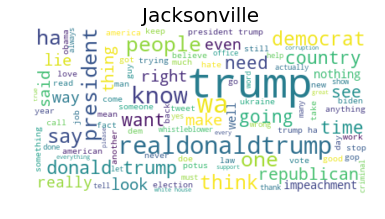

In [32]:
wordcloud_c2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_c2)

c2wc = plt.figure()

plt.imshow(wordcloud_c2, interpolation='bilinear')
plt.title('Jacksonville', fontsize=20)
plt.axis('off')

c2wc.savefig('jacksonville_tweets_wc.png', dpi = 500) 